• DOMAIN: Digital content and entertainment industry

• CONTEXT: The objective of this project is to build a text classification model that analyses the customer's 
sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build 
an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.
• DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). 
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For 
convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most 
frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 
10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

• PROJECT OBJECTIVE: To Build a sequential NLP classifier which can use input text parameters to determine the 
customer sentiments.

1. Import and analyse the data set. 

Hint: - Use `imdb.load_data()` method
 - Get train and test set
 - Take 10000 most frequent words
2. Perform relevant sequence adding on the data.
3. Perform following data analysis: 

• Print shape of features and labels

• Print value of any one feature and it's label
4. Decode the feature value to get original sentence.
5. Design, train, tune and test a sequential model. 

Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be 
analytical and experimental here in trying new approaches to design the best model.
6. Use the designed model to print the prediction on any one sample.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
nltk.download('wordnet')

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## **Step 1: Import and analyse the data set.**

In [2]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
#num_words=10,000 since Words are ranked by how often they occur (in the training set) 
#and only the num_words ie 10k most frequent words are kept

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
training_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
training_targets

array([1, 0, 0, ..., 0, 1, 0])

### **Analyzing the Dataset**

In [5]:
#Concatenating the training and testing data to perform various analysis
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [6]:
print("Categories:", np.unique(targets))


Categories: [0 1]


In [7]:
 #numpy.hstack() is used to stack the sequence of input arrays horizontally to make a single array.
print("Number of unique words:", len(np.unique(np.hstack(training_data))))

Number of unique words: 9998


In [8]:
length = [len(i) for i in data]
length[:10]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [9]:
max(length)

2494

In [10]:
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


So we see that dataset is labeled into two categories, — 0 or 1, which represents the sentiment of the review. 
The whole dataset contains 9,998 unique words and the average review length is 234 words, with a standard deviation of 173 words.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


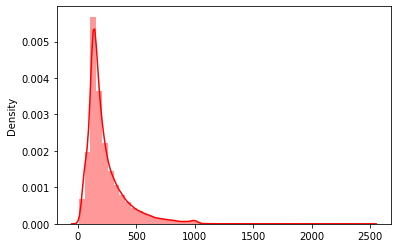

In [11]:
sns.distplot(length,color='red',label=' Total Review Length');

## **POSTIVE AND NEGATIVE REVIEW COMPARISION**

In [12]:
pos_rev=[]
neg_rev=[]

In [13]:
for i in np.arange(len(data)):
  if targets[i]==0:
    neg_rev.append(len(data[i]))
  else:
    pos_rev.append(len(data[i]))  

In [14]:
len(pos_rev),len(neg_rev)

(25000, 25000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Freq of Occurence'), Text(0.5, 0, 'Total Word Count')]

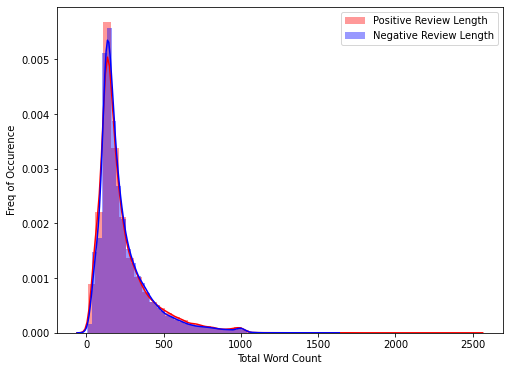

In [15]:
fig,ax=plt.subplots(figsize=(8,6));
sns.distplot(pos_rev,color='red',label='Positive Review Length');
sns.distplot(neg_rev,color='blue',label='Negative Review Length');
ax.legend()
ax.set(xlabel='Total Word Count',ylabel='Freq of Occurence')

We see that the histogram for both positive and negative reviews is nearly the same.

## **Step 2:Perform relevant sequence adding on the data**

In [16]:
#Use the first 20 words from each review to speed up training

from keras.preprocessing import sequence
max_review_length = 20

training_data1 = sequence.pad_sequences(training_data, maxlen=max_review_length,padding='post')
testing_data1 = sequence.pad_sequences(testing_data, maxlen=max_review_length,padding='post')

## **Step 3: Perform following data analysis**


## **Step 3.1: Print shape of features and labels**

In [17]:
len(training_data1),len(training_targets)

(25000, 25000)

In [18]:
len(testing_data1),len(testing_targets)


(25000, 25000)

In [19]:
length = [len(i) for i in training_data1]

In [20]:
np.unique(length)

array([20])

In [21]:
print("Shape of Training Features is",training_data1.shape)
print("Shape of Training Labels is",training_targets.shape,"\n")

print("Shape of Testing Features is",testing_data1.shape)
print("Shape of Testing Labels is",testing_targets.shape)

Shape of Training Features is (25000, 20)
Shape of Training Labels is (25000,) 

Shape of Testing Features is (25000, 20)
Shape of Testing Labels is (25000,)



## **Step 3.2: Print value of any one feature and it's label**


In [22]:
print("Label:", training_targets[5])

Label: 0


In [23]:
print(training_data1[5])

[  10   10 1361  173    4  749    2   16 3804    8    4  226   65   12
   43  127   24    2   10   10]


## **Step 4: Decode the feature value to get original sentence**

In [24]:
index = imdb.get_word_index()
#index

1654784/1641221 [==============================] - 0s 0us/step


In [25]:
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
#reverse_index

In [26]:
key_list=[key for key in sorted(reverse_index)] 
len(key_list),key_list[:10]   

(88584, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [27]:
decoded=" ".join( [reverse_index.get(i) for i in training_data1[5]] )
decoded

'i i slowly lot of above and with connect in of script their that out end his and i i'

In [28]:
print("Label:", training_targets[150])
print("Review:",training_data1[150])
print("Actual Sentence is : "," ".join( [reverse_index.get(i) for i in training_data1[150]] ))

Label: 1
Review: [  43   92 1278  501   15    8 6353    2   15 1609  131   47   24   77
    2  237    2    2  158  158]
Actual Sentence is :  out then rare days for in disabled and for angry these there his will and he's and and didn't didn't


In [29]:
print("Label:", training_targets[500])
print("Review:",training_data1[500])
print("Actual Sentence is : "," ".join( [reverse_index.get(i) for i in training_data1[500]] ))

Label: 0
Review: [ 21  15 191 607   4 910 552   7 229   5 226  20 198 138  10  10 241  46
   7 158]
Actual Sentence is :  not for big looked of badly roles br guy to script on series such i i am some br didn't


## **Step 5: Design, train, tune and test a sequential model.**

In [30]:
x_train = sequence.pad_sequences(training_data, maxlen=20)
x_test = sequence.pad_sequences(testing_data, maxlen=20)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 20)
x_test shape: (25000, 20)


In [31]:
y_train=training_targets
y_test=testing_targets

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding,LSTM


In [33]:
max_features=20000

In [34]:
model = keras.Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [35]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
results=model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 94s 111ms/step - loss: 0.5228 - accuracy: 0.7312 - val_loss: 0.4712 - val_accuracy: 0.7706
Epoch 2/10
782/782 [==============================] - 76s 98ms/step - loss: 0.3933 - accuracy: 0.8200 - val_loss: 0.4795 - val_accuracy: 0.7684
Epoch 3/10
782/782 [==============================] - 75s 95ms/step - loss: 0.3088 - accuracy: 0.8640 - val_loss: 0.5430 - val_accuracy: 0.7581
Epoch 4/10
782/782 [==============================] - 75s 96ms/step - loss: 0.2359 - accuracy: 0.8989 - val_loss: 0.6357 - val_accuracy: 0.7502
Epoch 5/10
782/782 [==============================] - 82s 105ms/step - loss: 0.1736 - accuracy: 0.9294 - val_loss: 0.7765 - val_accuracy: 0.7474
Epoch 6/10
782/782 [==============================] - 82s 104ms/step - loss: 0.1274 - accuracy: 0.9507 - val_loss: 0.9077 - val_accuracy: 0.7358
Epoch 7/10
782/782 [==============================] - 76s 97ms/step - loss: 0.0918 - accuracy: 0.9648 - val_loss: 1.0015 - val_accura

We have tried tuning the model with different optimizers (SGD, adam, rmsprop), changing dropout ratios and no. of neurons in NN. However, the above given model gives the best training and validation accuracies. 

In [37]:
loss, acc = model.evaluate(x_train, y_train)
print('Train Loss:', loss)
print('Train accuracy:', acc)

782/782 [==============================] - 6s 8ms/step - loss: 0.0218 - accuracy: 0.9938
Train Loss: 0.02178500033915043
Train accuracy: 0.9938399791717529


In [38]:
loss, acc = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test accuracy:', acc)

782/782 [==============================] - 6s 8ms/step - loss: 1.3697 - accuracy: 0.7350
Test Loss: 1.3697154521942139
Test accuracy: 0.735040009021759


Predicting Test data with Neural Network Model

In [39]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Embedding, LSTM, SpatialDropout1D

In [40]:
preds=model.predict(x_test)

In [41]:
preds

array([[3.0148169e-02],
       [9.9996209e-01],
       [2.7184013e-01],
       ...,
       [4.4850894e-05],
       [1.4406589e-01],
       [3.9618111e-01]], dtype=float32)

In [42]:
pred_classes=preds.reshape(len(x_test))
pred_classes

array([3.0148169e-02, 9.9996209e-01, 2.7184013e-01, ..., 4.4850894e-05,
       1.4406589e-01, 3.9618111e-01], dtype=float32)

## **Model Effect Overview**

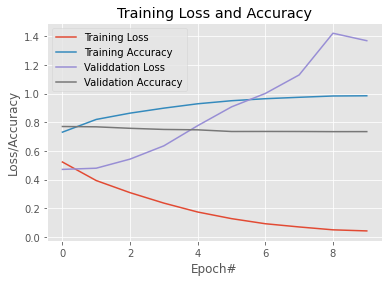

In [43]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0,10),results.history['loss'],label='Training Loss')
plt.plot(np.arange(0,10),results.history['accuracy'],label='Training Accuracy')
plt.plot(np.arange(0,10),results.history['val_loss'],label='Validdation Loss')
plt.plot(np.arange(0,10),results.history['val_accuracy'],label='Validation Accuracy')

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch#")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [44]:
print(np.mean(results.history["val_accuracy"]))

0.7472400009632111


## **Confusion Matrix and Correlation Report**

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd

In [46]:
#cm=confusion_matrix(x_test,preds)
#df_cm=pd.DataFrame(cm,index=['Bad','Good'],columns=['Bad','Good'])
#df_cm.head()

In [47]:
#report=classification_report(y_test,preds)
#print(report)

## **Step 6: Use the designed model to print the prediction on any one sample**

In [48]:
SentimentDict={1:'positive', 0:'negative'}

In [49]:
preds=model.predict(x_test)

In [50]:
preds

array([[3.0148169e-02],
       [9.9996209e-01],
       [2.7184013e-01],
       ...,
       [4.4850894e-05],
       [1.4406589e-01],
       [3.9618111e-01]], dtype=float32)

In [51]:
len(preds)

25000

In [52]:
pred_classes=preds.reshape(len(x_test))
pred_classes

array([3.0148169e-02, 9.9996209e-01, 2.7184013e-01, ..., 4.4850894e-05,
       1.4406589e-01, 3.9618111e-01], dtype=float32)

In [53]:
print("Review:",x_test[500],"\n")

print("Actual Sentence is : "," ".join( [reverse_index.get(i) for i in x_test[500]] ),'\n')

#print('Actual Label: ', SentimentDict[y_test[500]], ', Model Prediction: ', SentimentDict[pred[500]])

Review: [ 46 304  33   4 130  81  24 563  33   4 380   7   4 898  10  10  33 222
   6 693] 

Actual Sentence is :  some beautiful they of here people his cannot they of sex br of write i i they there's is supporting 



In [54]:
print("Review:",x_test[600],"\n")

print("Actual Sentence is : "," ".join( [reverse_index.get(i) for i in x_test[600]] ),'\n')

#print('Actual Label: ', SentimentDict[y_test[600]], ', Model Prediction: ', SentimentDict[pred_classes[600]])

Review: [   6  601  437    7   58    5  209    6  824   31    7    4  249    8
 2123    4  403    7 9142 6497] 

Actual Sentence is :  is group hope br my to comedy is tom by br of sure in creates of human br guided evelyn 



In [55]:
print("Review:",x_test[6000],"\n")

print("Actual Sentence is : "," ".join( [reverse_index.get(i) for i in x_test[6000]] ),'\n')

#print('Actual Label: ', SentimentDict[y_test[6000]], ', Model Prediction: ', SentimentDict[pred_classes[6000]])

Review: [ 113   33    2 6772   14    9    6   87  356   22    5   80   30 2395
   34  111 5122    8  216  358] 

Actual Sentence is :  acting they and mystical as it is him need you to into at influence who plot 1995 in saw use 



In [56]:
log_reg = LogisticRegression(solver='lbfgs', penalty='l2',max_iter=500,C=1,random_state=42)

In [57]:
log_reg.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=500, random_state=42)

In [58]:
predict_log_reg = log_reg.predict(x_test)

In [59]:
NB = MultinomialNB()
NB.fit(x_train, y_train)

MultinomialNB()

In [60]:
predict_NB = NB.predict(x_test)

In [61]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [62]:
predict_rf = rf.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score, classification_report

In [64]:
print('Accuracy score for Logistic Regression - ', accuracy_score(y_test, predict_log_reg))
print('Accuracy score for Naive Bayes - ', accuracy_score(y_test, predict_NB))
print('Accuracy score for Random Forest - ', accuracy_score(y_test, predict_rf))
print('Accuracy score for Neural Network - ', np.mean(results.history['val_accuracy']))

Accuracy score for Logistic Regression -  0.50524
Accuracy score for Naive Bayes -  0.5078
Accuracy score for Random Forest -  0.5434
Accuracy score for Neural Network -  0.7472400009632111


In [65]:
print('          Classification Report for Logistic Regression \n')
print(classification_report(y_test, predict_log_reg, target_names=['Positive','Negative']))

          Classification Report for Logistic Regression 

              precision    recall  f1-score   support

    Positive       0.51      0.39      0.44     12500
    Negative       0.50      0.62      0.56     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.50     25000
weighted avg       0.51      0.51      0.50     25000



In [66]:
print('          Classification Report for Naive Bayes \n')
print(classification_report(y_test, predict_NB, target_names=['Positive','Negative']))

          Classification Report for Naive Bayes 

              precision    recall  f1-score   support

    Positive       0.51      0.50      0.50     12500
    Negative       0.51      0.52      0.51     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.51      0.51      0.51     25000



In [67]:
print('          Classification Report for Random Forest \n')
print(classification_report(y_test, predict_rf, target_names=['Positive','Negative']))

          Classification Report for Random Forest 

              precision    recall  f1-score   support

    Positive       0.54      0.60      0.57     12500
    Negative       0.55      0.48      0.51     12500

    accuracy                           0.54     25000
   macro avg       0.54      0.54      0.54     25000
weighted avg       0.54      0.54      0.54     25000



In [68]:
predict_model = model.predict(x_test)

In [69]:
predict_model = predict_model[:, 0]

In [70]:
print(predict_model[5])

0.0066053635


In [71]:
print(y_test[5])

1


In [72]:
print(predict_model[10])

0.75425863


In [73]:
print(y_test[10])

1


#Conclusion:-
* IMDB data set was loaded with pre defined train and test data frame
Data Analysis was performed after combining the test and train data set
Orginal sentence was displayed

* 4 different models Logistic Regression, Naive Bayes, Random Forest and Neural Network model were built

* Accuracy and classification report were created to finalise the best model
Neural Network is the best model with highest accuracy in the test data
Finally validated the predicted sentiment with actual sentiment